### Data Preparation

**Import Library**

In [4]:
# !pip install numpy
# !pip install numpy==1.26.0

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
tf.random.set_seed(42)
sns.set_theme(style="whitegrid")
import matplotlib.dates as mdates

# !pip install keras-tuner
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
import random

**Read the files**

In [7]:
set1 = pd.read_csv('../Data/SET_main.csv')

# This file is consist of data that have Nan values
set2 = pd.read_csv('../Data/SET_residual.csv')

sp500 = pd.read_csv('../Data/sp500_main.csv')

In [8]:
# make the data  have 5 years
yrs_5 = round(sp500.shape[0]/2)
sp500 = sp500[-yrs_5:]
sp500

,Date,AAPL,AMZN,AVGO,COST,GOOG,GOOGL,HD,JPM,LLY,...,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,V,WMT,XOM
1377,2019-06-24,47.804260,95.695000,23.838812,244.098236,55.576309,55.633327,179.916992,92.635323,107.155220,...,192.021851,130.901733,3.794009,52.082222,98.022469,14.909333,229.979050,167.294678,34.155460,58.926094
1378,2019-06-25,47.079662,93.913498,23.609133,243.723160,54.123032,54.182587,179.251633,91.868042,106.904999,...,188.273117,126.768921,3.764683,51.467228,97.490173,14.650667,228.155029,164.821564,33.995792,58.405380
1379,2019-06-26,48.097954,94.891502,24.030066,241.938843,53.796707,53.820892,180.722427,92.481865,103.179611,...,187.096680,127.243965,3.958036,52.008804,95.753639,14.618000,224.294998,164.609924,33.823860,58.658096
1380,2019-06-27,48.083515,95.213997,24.394653,243.009399,53.607880,53.637062,181.247742,92.788757,103.300102,...,188.931152,127.452988,4.056702,52.109760,95.797272,14.856000,226.938934,164.773438,33.805428,58.060780
1381,2019-06-28,47.645382,94.681503,24.578226,241.801620,53.852005,53.944447,182.079514,95.312225,102.669930,...,192.420639,127.272423,4.081554,52.293343,95.683815,14.897333,224.792496,167.006012,33.925186,58.681042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,2024-12-05,243.039993,220.550003,170.470001,982.260010,174.112473,172.442368,426.540009,245.479996,825.619995,...,608.929993,442.619995,145.059998,186.240005,176.029999,369.489990,576.757812,309.079987,95.300003,114.779999
2751,2024-12-06,242.839996,227.029999,179.529999,992.609985,176.290009,174.510010,431.369995,247.360001,826.710022,...,623.770020,443.570007,142.440002,191.690002,173.820007,389.220001,547.519958,311.010010,95.699997,113.570000
2752,2024-12-09,246.750000,226.089996,178.940002,987.859985,177.100006,175.369995,429.179993,243.809998,803.580017,...,613.570007,446.019989,138.809998,190.449997,170.789993,389.790009,560.619995,308.299988,93.830002,112.900002
2753,2024-12-10,247.770004,225.039993,171.809998,993.400024,186.529999,185.169998,422.589996,242.860001,799.580017,...,619.320007,443.329987,135.070007,177.740005,172.279999,400.989990,565.190002,312.380005,94.550003,112.669998


In [9]:
sp500 = sp500.set_index('Date')
sp500

,AAPL,AMZN,AVGO,COST,GOOG,GOOGL,HD,JPM,LLY,MA,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2019-06-24,47.804260,95.695000,23.838812,244.098236,55.576309,55.633327,179.916992,92.635323,107.155220,257.358978,192.021851,130.901733,3.794009,52.082222,98.022469,14.909333,229.979050,167.294678,34.155460,58.926094
2019-06-25,47.079662,93.913498,23.609133,243.723160,54.123032,54.182587,179.251633,91.868042,106.904999,251.955734,188.273117,126.768921,3.764683,51.467228,97.490173,14.650667,228.155029,164.821564,33.995792,58.405380
2019-06-26,48.097954,94.891502,24.030066,241.938843,53.796707,53.820892,180.722427,92.481865,103.179611,253.478653,187.096680,127.243965,3.958036,52.008804,95.753639,14.618000,224.294998,164.609924,33.823860,58.658096
2019-06-27,48.083515,95.213997,24.394653,243.009399,53.607880,53.637062,181.247742,92.788757,103.300102,253.284622,188.931152,127.452988,4.056702,52.109760,95.797272,14.856000,226.938934,164.773438,33.805428,58.060780
2019-06-28,47.645382,94.681503,24.578226,241.801620,53.852005,53.944447,182.079514,95.312225,102.669930,256.612000,192.420639,127.272423,4.081554,52.293343,95.683815,14.897333,224.792496,167.006012,33.925186,58.681042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-05,243.039993,220.550003,170.470001,982.260010,174.112473,172.442368,426.540009,245.479996,825.619995,524.770020,608.929993,442.619995,145.059998,186.240005,176.029999,369.489990,576.757812,309.079987,95.300003,114.779999
2024-12-06,242.839996,227.029999,179.529999,992.609985,176.290009,174.510010,431.369995,247.360001,826.710022,528.570007,623.770020,443.570007,142.440002,191.690002,173.820007,389.220001,547.519958,311.010010,95.699997,113.570000
2024-12-09,246.750000,226.089996,178.940002,987.859985,177.100006,175.369995,429.179993,243.809998,803.580017,522.820007,613.570007,446.019989,138.809998,190.449997,170.789993,389.790009,560.619995,308.299988,93.830002,112.900002


In [10]:
sp500.shape

(1378, 20)

### Modeling 

**Data Preparation**

*Creating the function*

In [14]:
# Creating a function for data preparation 
def data_prep(df, stock_columns, test_size, window_size):
    results = {}
    
    for stock in stock_columns:
        print(f"Stock: {stock}")

        df.index = pd.to_datetime(df.index)
        
        # Plot training and test sets
        plt.figure(figsize=(12, 3))
        plt.plot(df.index[:-test_size], df[stock][:-test_size], color='black', label="Training set")
        plt.plot(df.index[-test_size:], df[stock][-test_size:], color='blue', label="Test set")
        plt.title(f"{stock} Training and Test Sets", fontsize=15)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Price", fontsize=12)
        
        # show only year
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())   
        plt.xlim(df.index.min(), df.index.max())
        plt.grid(color="lightgray")  
        plt.gca().set_facecolor("white") 
        plt.legend(loc="upper left")
        plt.tight_layout() 
        plt.show()

        # Scale the data 
        scaler = MinMaxScaler()
        
        # Window size (e.g., 30 days)
        window_size = window_size

        # Training set
        train_data = df[stock][:-test_size].values
        train_data = scaler.fit_transform(train_data.reshape(-1, 1))
        
        X_train, y_train = [], []
        for i in range(window_size, len(train_data)):
            X_train.append(train_data[i-window_size:i, 0])
            y_train.append(train_data[i, 0])
        
        # Testing set
        test_data = df[stock][-test_size-window_size:].values
        test_data = scaler.transform(test_data.reshape(-1, 1))
        
        X_test, y_test = [], []
        for i in range(window_size, len(test_data)):
            X_test.append(test_data[i-window_size:i, 0])
            y_test.append(test_data[i, 0])
        
        # Convert to numpy arrays to make it acceptable for the model
        X_train = np.array(X_train).reshape(-1, window_size, 1)
        X_test = np.array(X_test).reshape(-1, window_size, 1)
        y_train = np.array(y_train).reshape(-1, 1)
        y_test = np.array(y_test).reshape(-1, 1)

        print(f'{stock} - X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}')
        print(f'{stock} - X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}')
        
        # Store results
        results[stock] = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test}
    
    return results


*Applying the function for sp500 (Stock exchange of Thailand)*

In [16]:
stock_columns = list(sp500.columns)
test_size = 360 
window_size = 60

Stock: AAPL


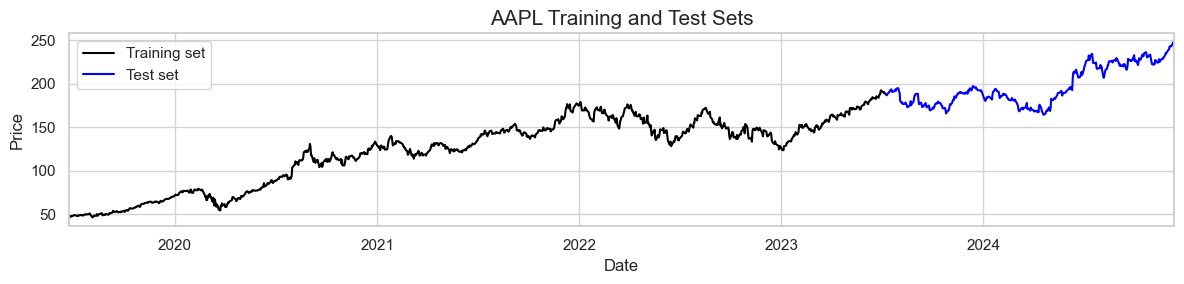

AAPL - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
AAPL - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: AMZN


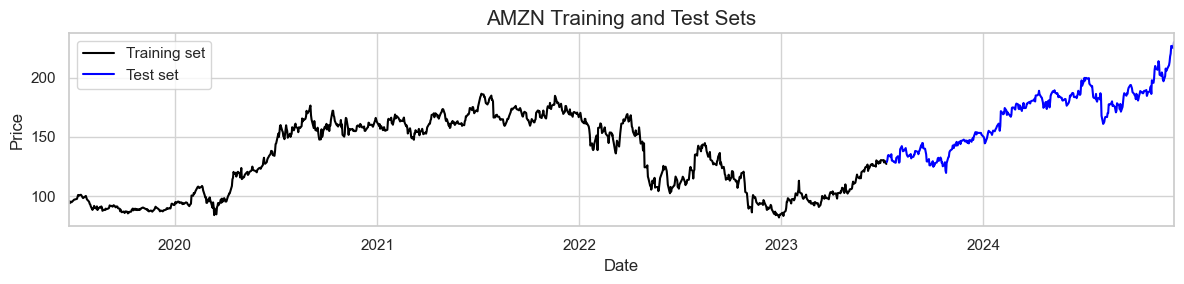

AMZN - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
AMZN - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: AVGO


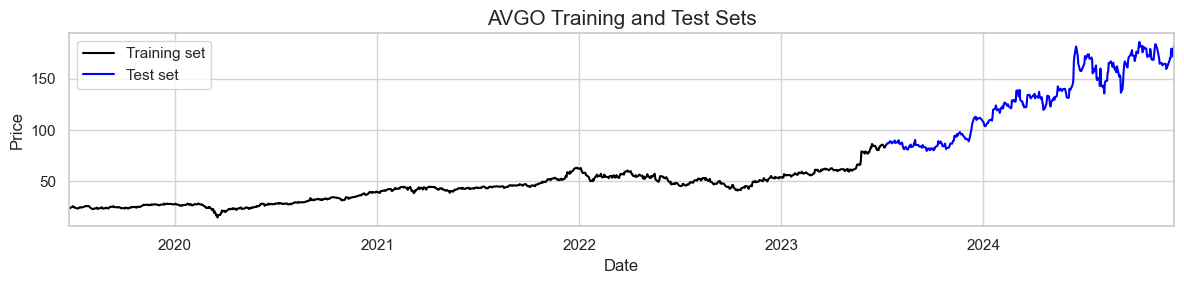

AVGO - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
AVGO - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: COST


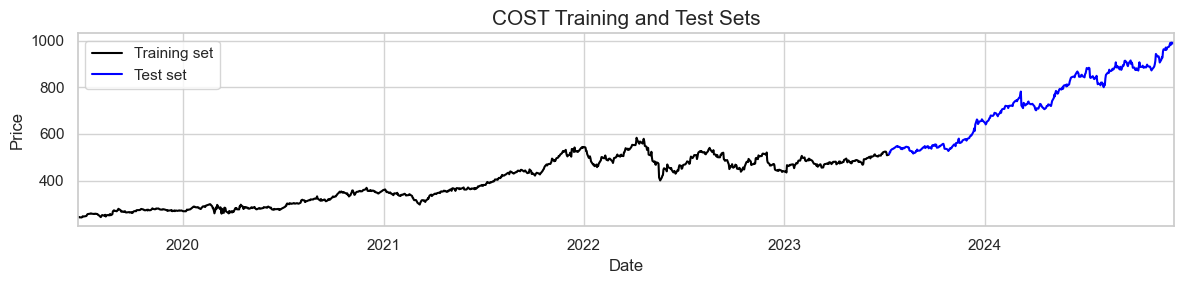

COST - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
COST - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: GOOG


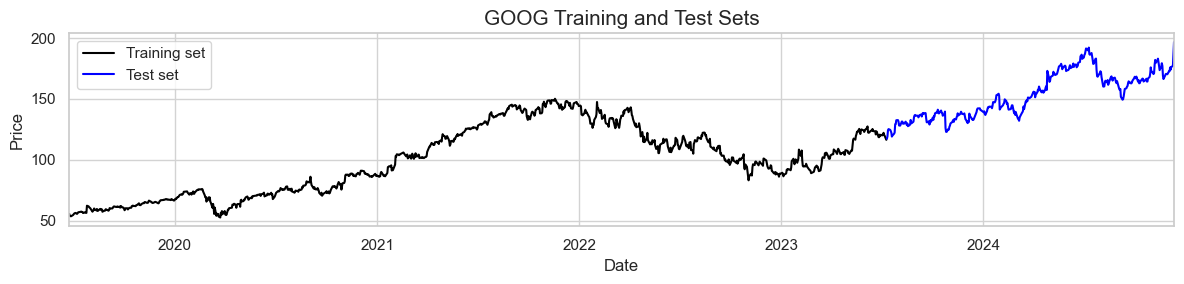

GOOG - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
GOOG - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: GOOGL


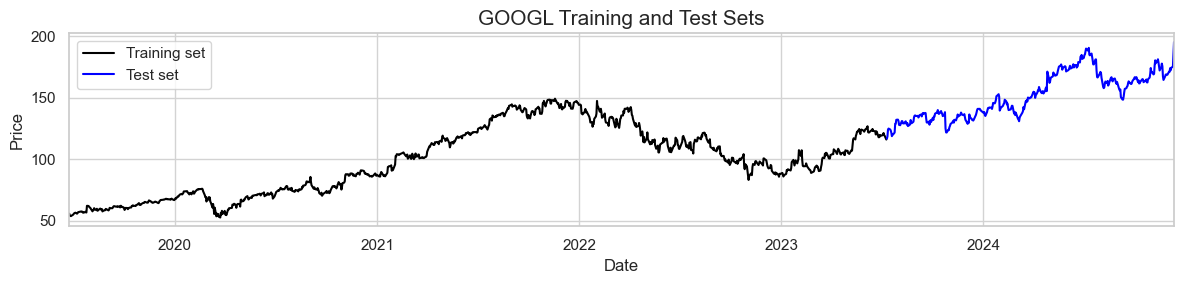

GOOGL - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
GOOGL - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: HD


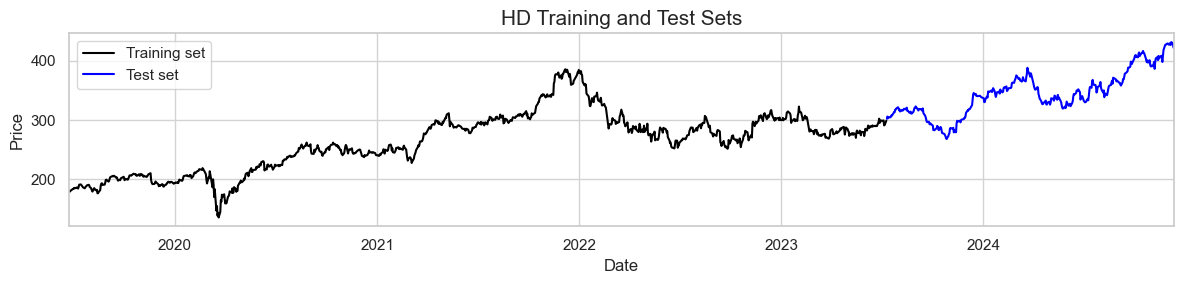

HD - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
HD - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: JPM


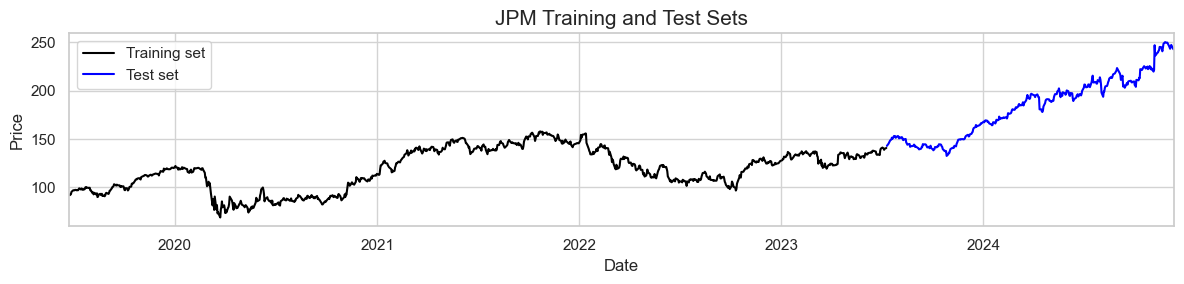

JPM - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
JPM - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: LLY


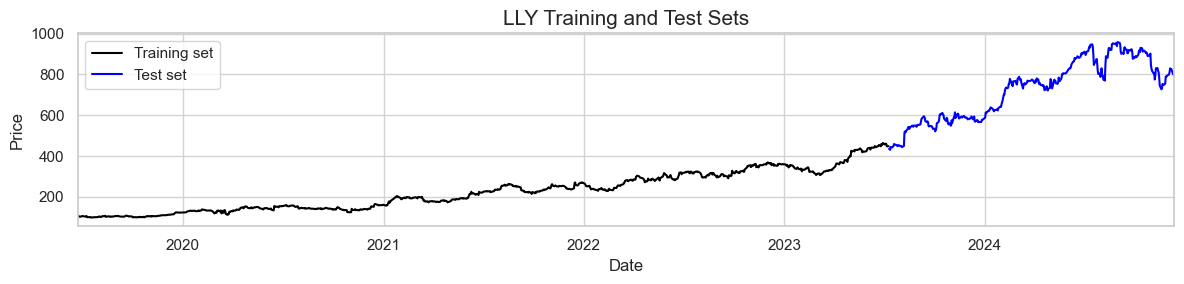

LLY - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
LLY - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: MA


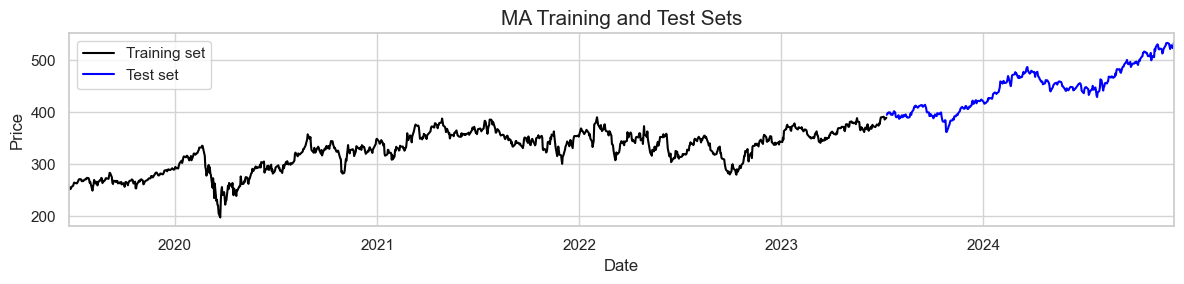

MA - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
MA - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: META


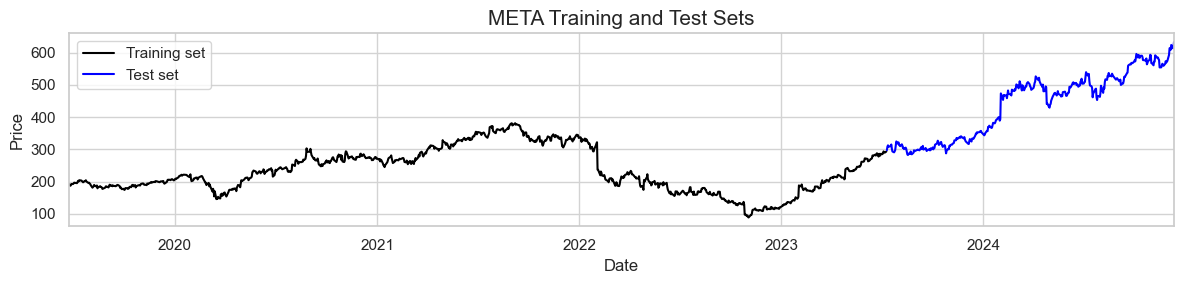

META - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
META - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: MSFT


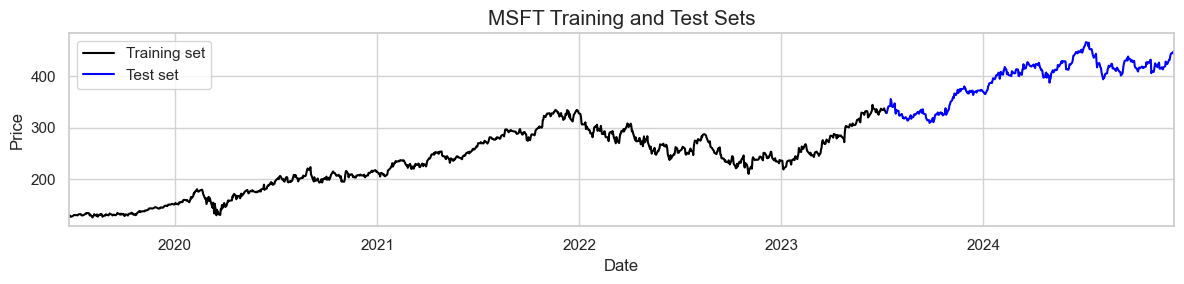

MSFT - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
MSFT - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: NVDA


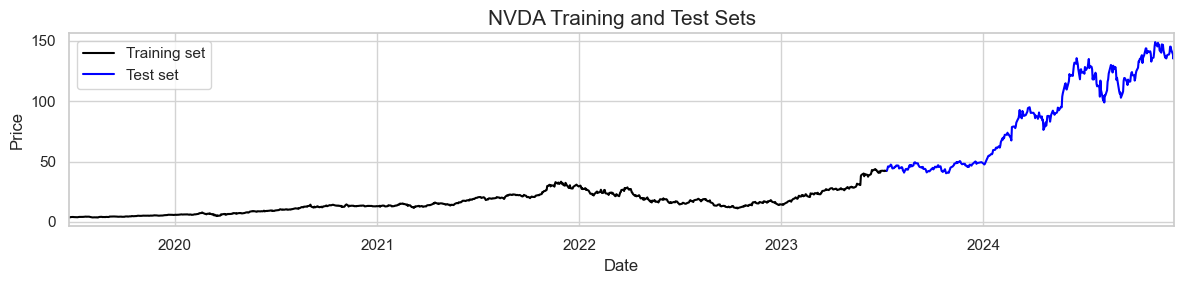

NVDA - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
NVDA - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: ORCL


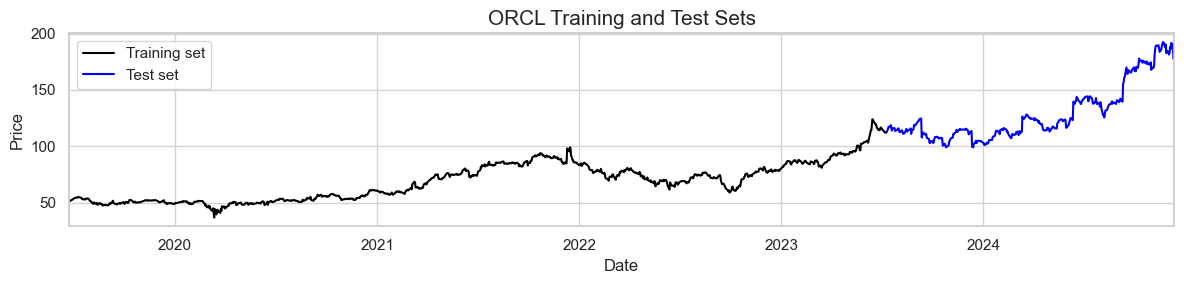

ORCL - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
ORCL - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: PG


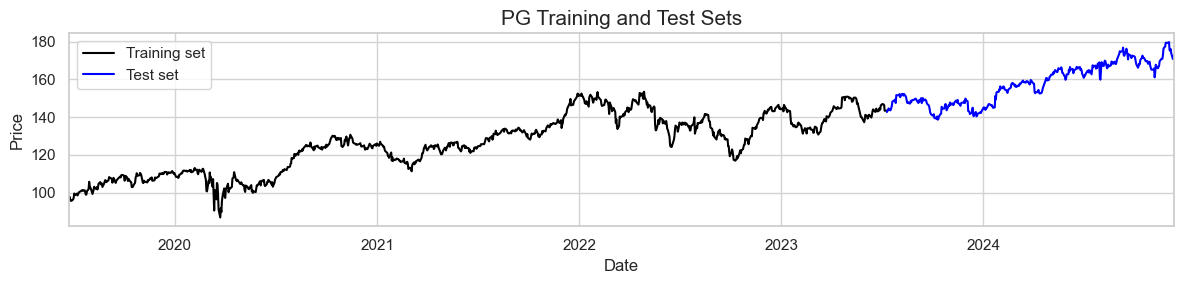

PG - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
PG - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: TSLA


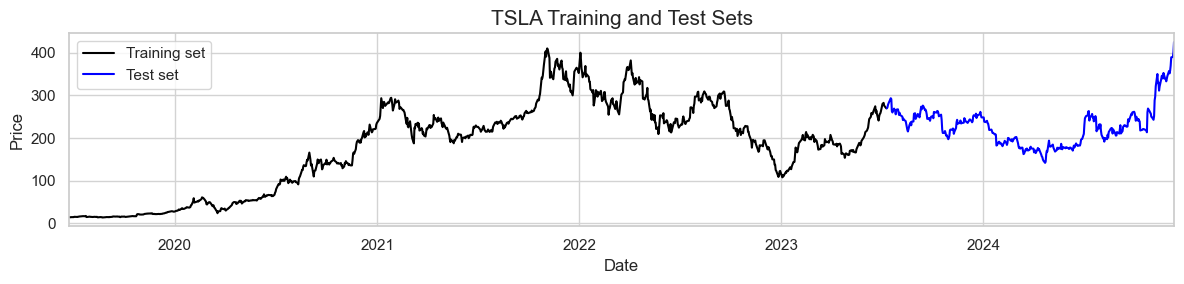

TSLA - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
TSLA - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: UNH


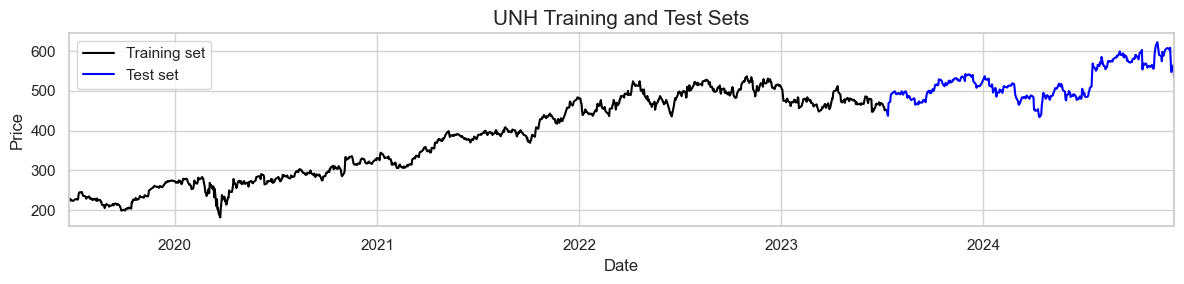

UNH - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
UNH - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: V


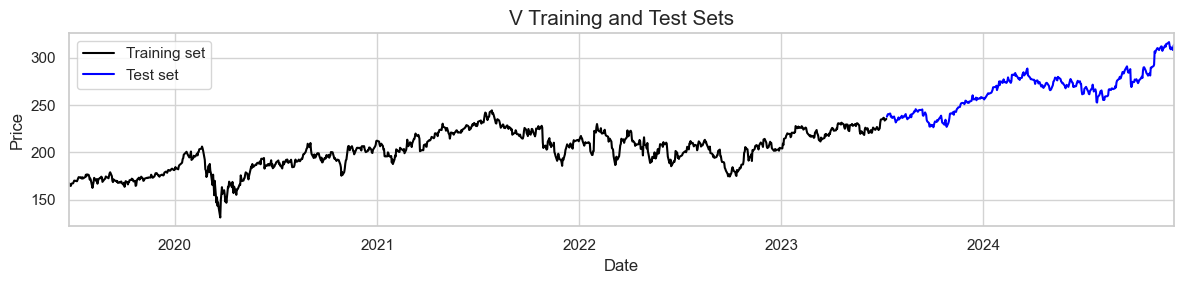

V - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
V - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: WMT


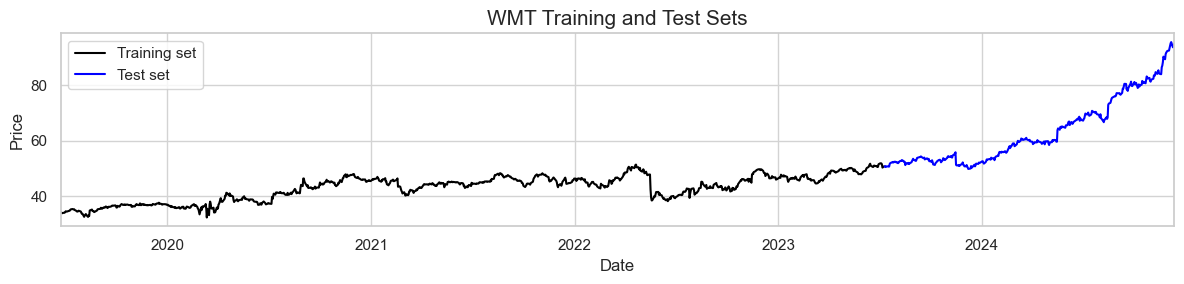

WMT - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
WMT - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)
Stock: XOM


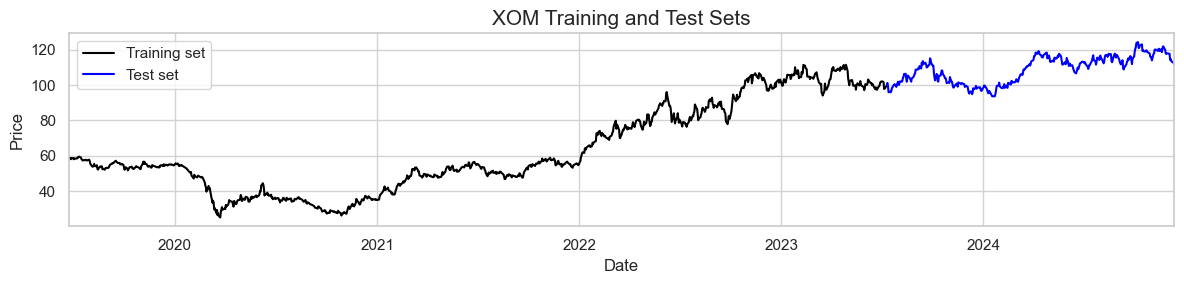

XOM - X_train Shape: (958, 60, 1), y_train Shape: (958, 1)
XOM - X_test Shape: (360, 60, 1), y_test Shape: (360, 1)


In [17]:
# data preparation for dataframe sp500
# Adjusting the portfolio for 1 year time frame 
results = data_prep(df=sp500, stock_columns=stock_columns, test_size=test_size, window_size=window_size)

**Create function for LSTM model and Training**

*Create the model*

In [20]:
# Set random seeds
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

def define_model(units_lstm_1, units_lstm_2, units_lstm_3, dropout_1, dropout_2, dropout_3, dense_units, optimizer_name):
    input1 = Input(shape=(window_size, 1))
    
    # First LSTM layer 
    x = LSTM(units=units_lstm_1, return_sequences=True)(input1)  
    x = Dropout(dropout_1)(x)
    
    # Second LSTM layer
    x = LSTM(units=units_lstm_2, return_sequences=True)(x)
    x = Dropout(dropout_2)(x)
    
    # Third LSTM layer
    x = LSTM(units=units_lstm_3)(x)
    x = Dropout(dropout_3)(x)
    
    # Dense layer with dynamic units
    x = Dense(dense_units, activation='relu')(x)
    
    # Output layer
    dnn_output = Dense(1)(x)

    # Map optimizer name to optimizer object
    optimizer_mapping = {
        'adam': Adam(),
        'nadam': Nadam(),
        'rmsprop': RMSprop()
    }
    optimizer = optimizer_mapping.get(optimizer_name, Adam())
    
    # Compile the model
    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.summary()
    
    return model

**Find the best hyperparameters**

In [22]:
# Function to Find the best hyperparameters
input1 = Input(shape=(window_size , 1))
def build_model(hp):
    # Tune the number of units in LSTM layers
    x = LSTM(units=hp.Int('units_layer_1', min_value=32, max_value=128, step=32), return_sequences=True)(input1)
    x = Dropout(hp.Float('dropout_layer_1', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = LSTM(units=hp.Int('units_layer_2', min_value=32, max_value=128, step=32), return_sequences=True)(x)
    x = Dropout(hp.Float('dropout_layer_2', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = LSTM(units=hp.Int('units_layer_3', min_value=32, max_value=128, step=32))(x)
    x = Dropout(hp.Float('dropout_layer_3', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = Dense(hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])

    # Tune the optimizer and learning rate
    optimizer = hp.Choice('optimizer', values=['adam', 'nadam', 'rmsprop'])
    model.compile(loss='mean_squared_error', 
                  optimizer=optimizer, 
                  metrics=['mean_squared_error'])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    return model


In [23]:
# Loop through each column 
for stock in sp500.columns:
    # Recall X_train, X_test, y_train, y_test for each stock
    X_train = results[stock]['X_train']
    X_test = results[stock]['X_test']
    y_train = results[stock]['y_train']
    y_test = results[stock]['y_test']
    
    # Now you can use these variables (X_train, X_test, y_train, y_test) for further processing
    print(f"Processed {stock}: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

Processed AAPL: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed AMZN: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed AVGO: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed COST: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed GOOG: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed GOOGL: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed HD: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed JPM: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed LLY: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed MA: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed META: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed MSFT: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed NVDA: X_train shape: (958, 60, 1), X_test shape: (360, 60, 1)
Processed ORCL: X_train shape: (958, 60, 1), X_test shape: (360, 60, 

In [24]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error', 
    max_trials=2,  
    executions_per_trial=1,  
    directory='tuner_results',
    project_name='lstm_tuning', 
    overwrite=True)
    

**Loop for all stocks name finding best hyperparameters, fit, and evaluate the model**

In [26]:
import time 
def find_fit_eva(df, test_size, results, tuner, define_model):
    # Start the timer for the entire process
    t0 = time.time()
    
    # Initialize dictionary to store hyperparameters + predictions + model
    hyperparameters_ = {}
    predictions_ = {}
    models_ = {}
    
    # Loop through each stock column in the dataframe
    for stock in df.columns:
        # Recall X_train, X_test, y_train, y_test for each stock
        X_train = results[stock]['X_train']
        X_test = results[stock]['X_test']
        y_train = results[stock]['y_train']
        y_test = results[stock]['y_test']
        
        # Hyperparameter tuning search for the current stock
        print(f"Starting tuning for {stock}...")
        tuner.search(X_train, y_train, 
                     epochs=50, 
                     batch_size=32, 
                     validation_split=0.2, 
                     verbose=1)
        
        # Get the best hyperparameters
        best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
        print(f"Best Hyperparameters for {stock}:\n {best_hyperparameters.values}")
    
        # Extract parameters values
        units_lstm_1 = best_hyperparameters['units_layer_1']
        units_lstm_2 = best_hyperparameters['units_layer_2']
        units_lstm_3 = best_hyperparameters['units_layer_3']
        dropout_1 = best_hyperparameters['dropout_layer_1']
        dropout_2 = best_hyperparameters['dropout_layer_2']
        dropout_3 = best_hyperparameters['dropout_layer_3']
        dense_units = best_hyperparameters['dense_units']
        optimizer_name = best_hyperparameters['optimizer']
    
        # Save the hyperparameters in a dictionary of DataFrames
        hyperparameters_dict = best_hyperparameters.values
        hyperparameters_[stock] = pd.DataFrame([hyperparameters_dict])
        print(hyperparameters_[stock].T) 
        
        # Define the model with the best hyperparameters
        model = define_model(units_lstm_1, units_lstm_2, units_lstm_3, dropout_1, dropout_2, dropout_3, dense_units, optimizer_name)
        
        # Train the model
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
        
        # Evaluate the model
        print(f"\nEvaluating best model for {stock}")
        test_loss = model.evaluate(X_test, y_test, verbose=0)
        y_pred = model.predict(X_test) 
        print(f'Test loss for {stock}: {test_loss:.4f}')
    
        # Inverse transform predictions and true values
        scaler = MinMaxScaler()
        train_data = df[stock][:-test_size].values
        scaler.fit(train_data.reshape(-1, 1))  # Fit scaler only on training data
        y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))
        y_test_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
        train_data = scaler.transform(train_data.reshape(-1, 1))

        # Store the predicted values for the stock
        predictions_[stock] = y_test_pred
        
        # Calculate evaluation metrics
        MSE = mean_squared_error(y_test_true, y_test_pred)
        RMSE = np.sqrt(MSE)
        print(f"Test MSE for {stock}: {MSE:.4f}")
        print(f"Test RMSE for {stock}: {RMSE:.4f}")

        df.index = pd.to_datetime(df.index)
        
        # Plot the prices predicted with actual
        plt.figure(figsize=(12, 3))
        plt.plot(df.index[:-test_size], scaler.inverse_transform(train_data), color='black', label='Training Data')
        plt.plot(df.index[-test_size:], y_test_true, color='blue', label='Actual Test Data')
        plt.plot(df.index[-test_size:], y_test_pred, color='red', label='Predicted Test Data')
        plt.title(f'Model Performance on {stock} Prediction', fontsize=15)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.legend(loc='upper left')
        plt.show()

        # Save the images
        plt.savefig(f'../images/{stock}_prediction_chart.png', format='png')

        # Store the model for this stock
        models_[stock] = model
        
    # Time to run in seconds for the entire process
    print(f"Total time taken for the entire process: {time.time() - t0} seconds")
    
    return hyperparameters_ , predictions_ , models_


Trial 2 Complete [00h 08m 03s]
val_mean_squared_error: 0.0007492744480259717

Best val_mean_squared_error So Far: 0.0007492744480259717
Total elapsed time: 00h 13m 06s
Best Hyperparameters for AAPL:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 655ms/step - loss: 0.1368 - val_loss: 0.0169
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 427ms/step - loss: 0.0176 - val_loss: 0.0149
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 374ms/step - loss: 0.0133 - val_loss: 0.0074
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 359ms/step - loss: 0.0092 - val_loss: 0.0100
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 440ms/step - loss: 0.0083 - val_loss: 0.0051
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - loss: 0.0077 - val_loss: 0.0053
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 332ms/step - loss: 0.0075 - val_loss: 0.0048
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 350ms/step - loss: 0.0063 - val_loss: 0.0040
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 353ms/step - loss: 0.0058 - val_loss: 0.0028
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 320ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/s

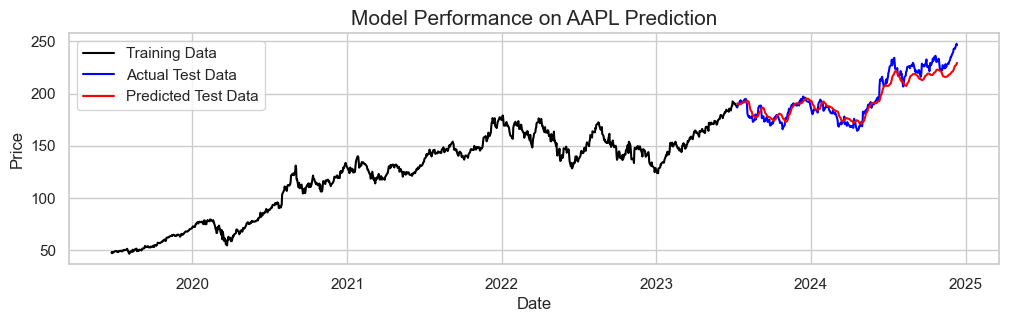

Starting tuning for AMZN...
Best Hyperparameters for AMZN:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 376ms/step - loss: 0.1842 - val_loss: 0.0064
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 420ms/step - loss: 0.0235 - val_loss: 0.0052
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 411ms/step - loss: 0.0178 - val_loss: 0.0072
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 393ms/step - loss: 0.0139 - val_loss: 0.0050
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 466ms/step - loss: 0.0112 - val_loss: 0.0044
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 436ms/step - loss: 0.0127 - val_loss: 0.0064
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 442ms/step - loss: 0.0105 - val_loss: 0.0056
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 438ms/step - loss: 0.0101 - val_loss: 0.0074
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - loss: 0.0128 - val_loss: 0.0031
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 477ms/step - loss: 0.0090 - val_loss: 0.0034
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 423ms/step - loss: 0.0073 - val_loss: 0.0029
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s

<Figure size 640x480 with 0 Axes>

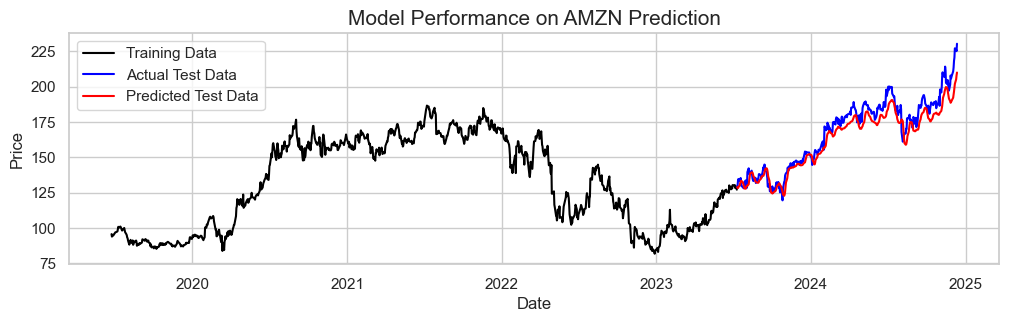

Starting tuning for AVGO...
Best Hyperparameters for AVGO:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 457ms/step - loss: 0.0420 - val_loss: 0.0065
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 450ms/step - loss: 0.0058 - val_loss: 0.0086
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 526ms/step - loss: 0.0058 - val_loss: 0.0061
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 605ms/step - loss: 0.0048 - val_loss: 0.0052
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 463ms/step - loss: 0.0037 - val_loss: 0.0048
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 374ms/step - loss: 0.0034 - val_loss: 0.0311
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 347ms/step - loss: 0.0032 - val_loss: 0.0051
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - loss: 0.0031 - val_loss: 0.0051
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - loss: 0.0034 - val_loss: 0.0158
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 417ms/step - loss: 0.0023 - val_loss: 0.0139
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 483ms/step - loss: 0.0028 - val_loss: 0.0171
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 49

<Figure size 640x480 with 0 Axes>

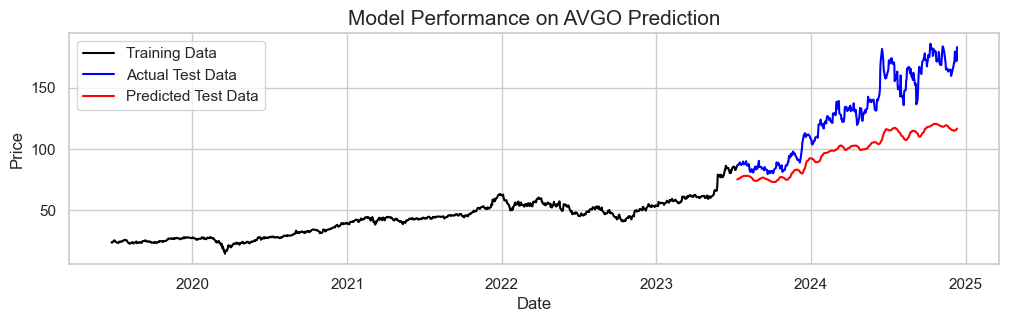

Starting tuning for COST...
Best Hyperparameters for COST:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 350ms/step - loss: 0.0918 - val_loss: 0.0032
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - loss: 0.0101 - val_loss: 0.0271
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 337ms/step - loss: 0.0102 - val_loss: 0.0136
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - loss: 0.0113 - val_loss: 0.0046
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - loss: 0.0067 - val_loss: 0.0125
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - loss: 0.0075 - val_loss: 0.0112
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - loss: 0.0057 - val_loss: 0.0275
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - loss: 0.0092 - val_loss: 0.0055
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 318ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - loss: 0.0060 - val_loss: 0.0093
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/ste

<Figure size 640x480 with 0 Axes>

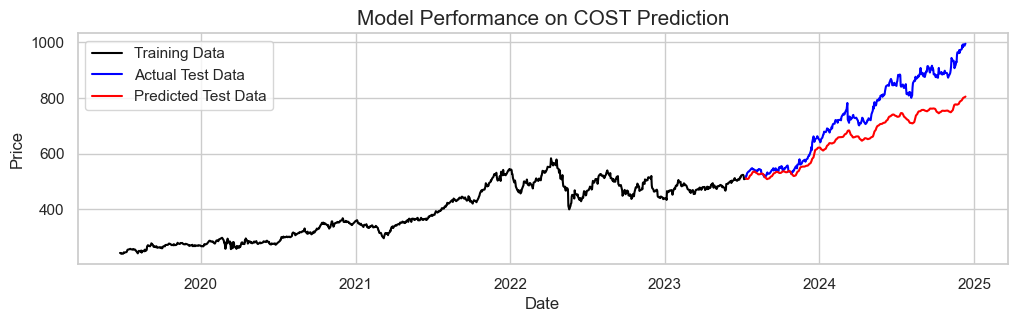

Starting tuning for GOOG...
Best Hyperparameters for GOOG:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 356ms/step - loss: 0.1449 - val_loss: 0.0084
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - loss: 0.0109 - val_loss: 0.0075
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - loss: 0.0092 - val_loss: 0.0066
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - loss: 0.0097 - val_loss: 0.0053
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 340ms/step - loss: 0.0094 - val_loss: 0.0282
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - loss: 0.0126 - val_loss: 0.0235
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - loss: 0.0107 - val_loss: 0.0309
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step - loss: 0.0114 - val_loss: 0.0079
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - loss: 0.0113 - val_loss: 0.0028
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - loss: 0.0069 - val_loss: 0.0043
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - loss: 0.0059 - val_loss: 0.0184
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/ste

<Figure size 640x480 with 0 Axes>

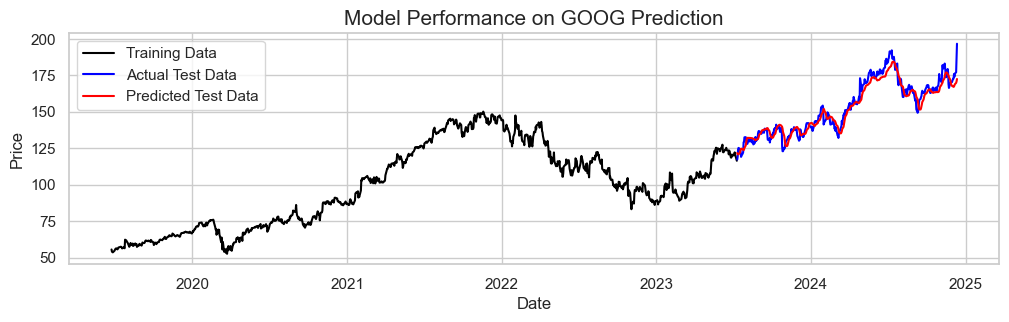

Starting tuning for GOOGL...
Best Hyperparameters for GOOGL:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 340ms/step - loss: 0.1256 - val_loss: 0.0042
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 318ms/step - loss: 0.0122 - val_loss: 0.0069
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - loss: 0.0111 - val_loss: 0.0107
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 350ms/step - loss: 0.0108 - val_loss: 0.0102
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - loss: 0.0102 - val_loss: 0.0053
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 315ms/step - loss: 0.0072 - val_loss: 0.0060
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 292ms/step - loss: 0.0066 - val_loss: 0.0200
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - loss: 0.0084 - val_loss: 0.0079
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - loss: 0.0067 - val_loss: 0.0121
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/ste

<Figure size 640x480 with 0 Axes>

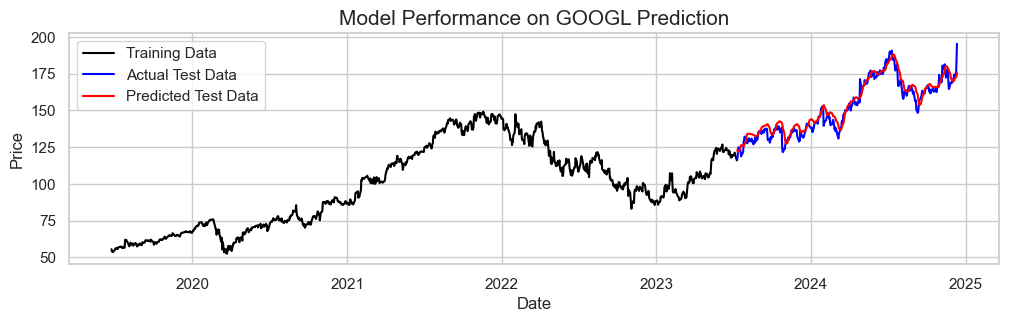

Starting tuning for HD...
Best Hyperparameters for HD:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 361ms/step - loss: 0.0926 - val_loss: 0.0076
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - loss: 0.0129 - val_loss: 0.0102
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - loss: 0.0130 - val_loss: 0.0342
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - loss: 0.0112 - val_loss: 0.0022
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - loss: 0.0066 - val_loss: 0.0057
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - loss: 0.0127 - val_loss: 0.0100
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - loss: 0.0078 - val_loss: 0.0054
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - loss: 0.0081 - val_loss: 0.0116
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - loss: 0.0077 - val_loss: 0.0024
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - loss: 0.0044 - val_loss: 0.0050
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - loss: 0.0050 - val_loss: 0.0242
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 297ms/ste

<Figure size 640x480 with 0 Axes>

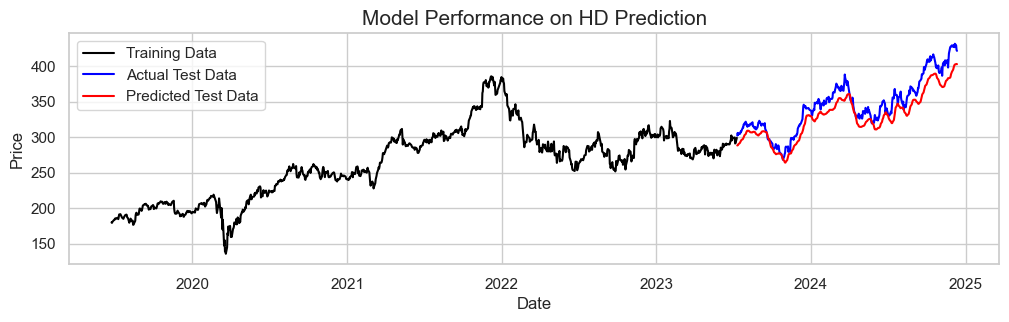

Starting tuning for JPM...
Best Hyperparameters for JPM:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 447ms/step - loss: 0.1024 - val_loss: 0.0058
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 518ms/step - loss: 0.0166 - val_loss: 0.0063
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 397ms/step - loss: 0.0126 - val_loss: 0.0047
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 393ms/step - loss: 0.0108 - val_loss: 0.0030
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - loss: 0.0077 - val_loss: 0.0028
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 516ms/step - loss: 0.0117 - val_loss: 0.0027
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 430ms/step - loss: 0.0068 - val_loss: 0.0025
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 509ms/step - loss: 0.0079 - val_loss: 0.0039
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 484ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 422ms/step - loss: 0.0063 - val_loss: 0.0036
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - loss: 0.0064 - val_loss: 0.0073
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s

<Figure size 640x480 with 0 Axes>

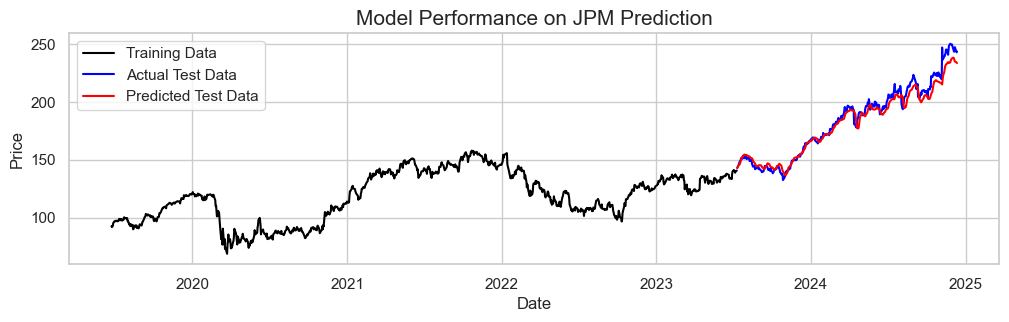

Starting tuning for LLY...
Best Hyperparameters for LLY:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 481ms/step - loss: 0.0460 - val_loss: 0.0108
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 504ms/step - loss: 0.0072 - val_loss: 0.0029
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - loss: 0.0033 - val_loss: 0.0062
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 414ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - loss: 0.0020 - val_loss: 0.0528
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 375ms/step - loss: 0.0029 - val_loss: 0.0245
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 389ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 348ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - loss: 0.0020 - val_loss: 0.0073
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 387ms/step - loss: 0.0014 - val_loss: 0.0060
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 421

<Figure size 640x480 with 0 Axes>

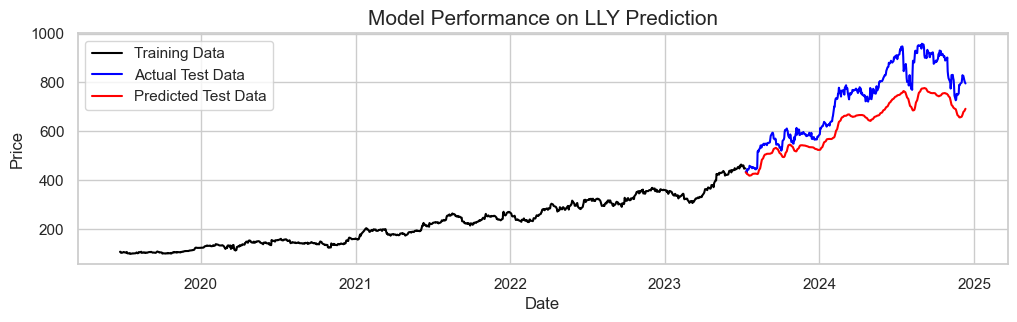

Starting tuning for MA...
Best Hyperparameters for MA:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 387ms/step - loss: 0.2349 - val_loss: 0.0056
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 407ms/step - loss: 0.0184 - val_loss: 0.0213
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 382ms/step - loss: 0.0287 - val_loss: 0.0577
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 345ms/step - loss: 0.0217 - val_loss: 0.0628
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 341ms/step - loss: 0.0205 - val_loss: 0.0676
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - loss: 0.0209 - val_loss: 0.0279
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 452ms/step - loss: 0.0154 - val_loss: 0.0132
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 438ms/step - loss: 0.0151 - val_loss: 0.0026
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 535ms/step - loss: 0.0106 - val_loss: 0.0091
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 436ms/step - loss: 0.0130 - val_loss: 0.0059
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 396ms/step - loss: 0.0124 - val_loss: 0.0020
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 41

<Figure size 640x480 with 0 Axes>

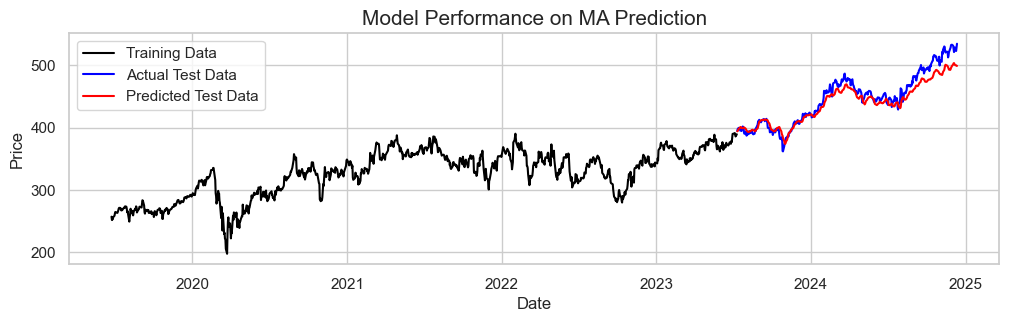

Starting tuning for META...
Best Hyperparameters for META:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 370ms/step - loss: 0.1249 - val_loss: 0.0051
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - loss: 0.0172 - val_loss: 0.0034
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 348ms/step - loss: 0.0120 - val_loss: 0.0030
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - loss: 0.0110 - val_loss: 0.0125
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 332ms/step - loss: 0.0140 - val_loss: 0.0018
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 351ms/step - loss: 0.0084 - val_loss: 0.0025
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step - loss: 0.0068 - val_loss: 0.0018
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 340ms/step - loss: 0.0079 - val_loss: 0.0036
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - loss: 0.0073 - val_loss: 0.0076
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - loss: 0.0073 - val_loss: 0.0018
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 363ms/ste

<Figure size 640x480 with 0 Axes>

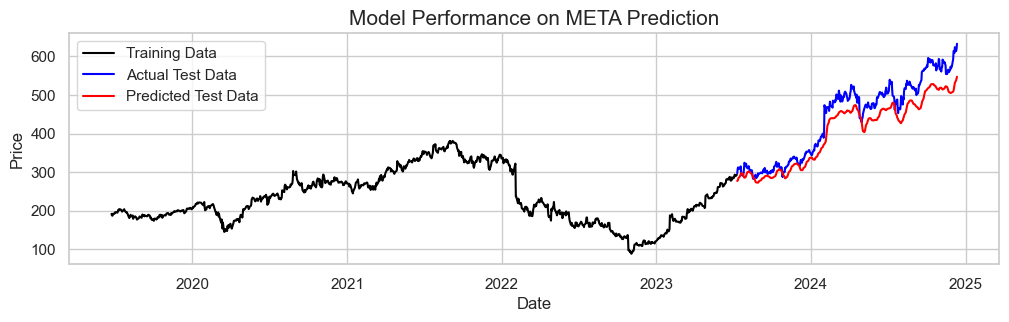

Starting tuning for MSFT...
Best Hyperparameters for MSFT:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 436ms/step - loss: 0.0901 - val_loss: 0.0071
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 417ms/step - loss: 0.0127 - val_loss: 0.0065
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 390ms/step - loss: 0.0094 - val_loss: 0.0078
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step - loss: 0.0108 - val_loss: 0.0067
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 389ms/step - loss: 0.0068 - val_loss: 0.0085
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 435ms/step - loss: 0.0096 - val_loss: 0.0444
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 414ms/step - loss: 0.0086 - val_loss: 0.0040
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 397ms/step - loss: 0.0073 - val_loss: 0.0050
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 407ms/step - loss: 0.0071 - val_loss: 0.0036
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 390ms/step - loss: 0.0056 - val_loss: 0.0028
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 43

<Figure size 640x480 with 0 Axes>

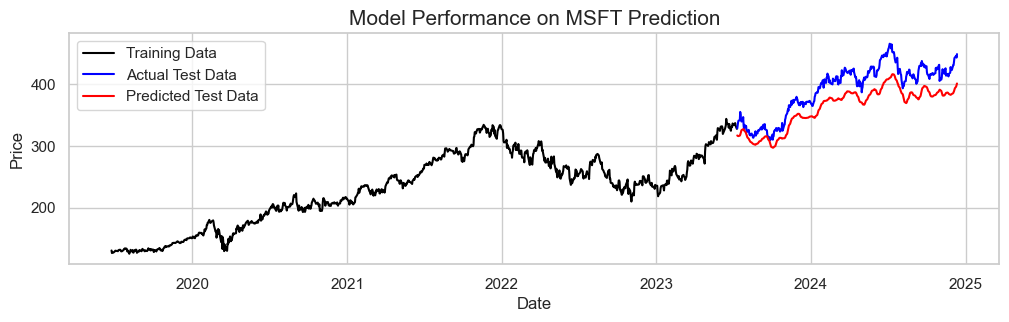

Starting tuning for NVDA...
Best Hyperparameters for NVDA:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 360ms/step - loss: 0.0320 - val_loss: 0.0051
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - loss: 0.0069 - val_loss: 0.0042
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - loss: 0.0047 - val_loss: 0.0214
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 398ms/step - loss: 0.0036 - val_loss: 0.0409
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 310ms/step - loss: 0.0044 - val_loss: 0.0164
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 286ms/step - loss: 0.0028 - val_loss: 0.0130
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - loss: 0.0026 - val_loss: 0.0230
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - loss: 0.0026 - val_loss: 0.0191
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0026 - val_loss: 0.0134
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/ste

<Figure size 640x480 with 0 Axes>

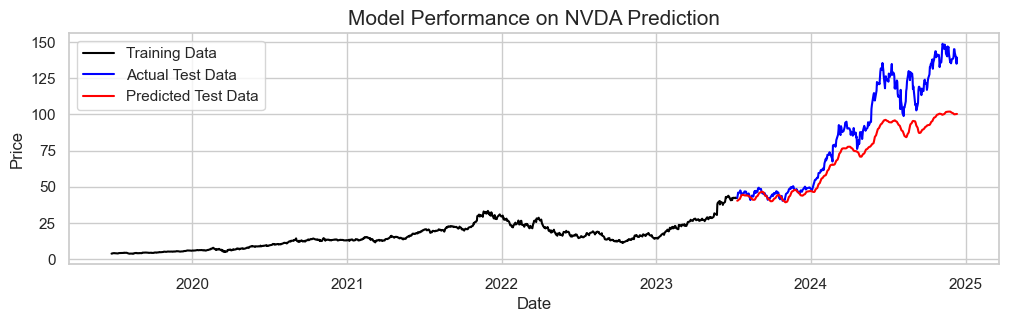

Starting tuning for ORCL...
Best Hyperparameters for ORCL:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_42 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_44 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - loss: 0.0413 - val_loss: 0.0034
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - loss: 0.0063 - val_loss: 0.0041
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0045 - val_loss: 0.0077
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - loss: 0.0038 - val_loss: 0.0179
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - loss: 0.0027 - val_loss: 0.0221
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - loss: 0.0028 - val_loss: 0.0294
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - loss: 0.0029 - val_loss: 0.0229
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step

<Figure size 640x480 with 0 Axes>

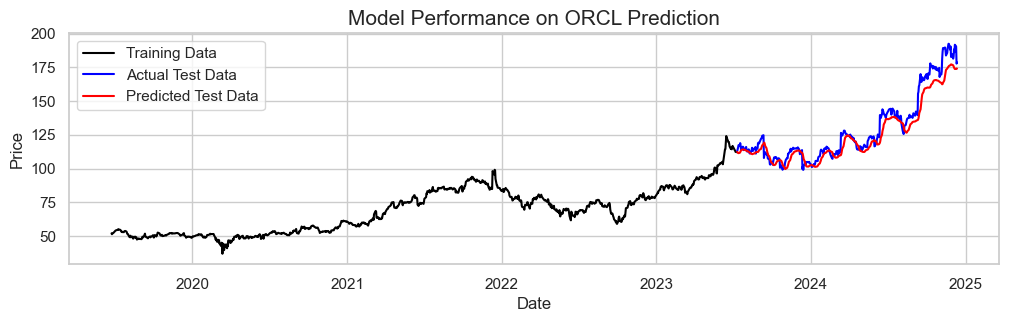

Starting tuning for PG...
Best Hyperparameters for PG:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_46 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - loss: 0.1565 - val_loss: 0.0105
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - loss: 0.0197 - val_loss: 0.0106
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - loss: 0.0163 - val_loss: 0.0096
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - loss: 0.0124 - val_loss: 0.0057
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - loss: 0.0097 - val_loss: 0.0501
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 0.0118 - val_loss: 0.0211
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - loss: 0.0100 - val_loss: 0.0037
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - loss: 0.0081 - val_loss: 0.0075
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - loss: 0.0077 - val_loss: 0.0049
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 0.0085 - val_loss: 0.0071
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - loss: 0.0075 - val_loss: 0.0060
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 320ms/step

<Figure size 640x480 with 0 Axes>

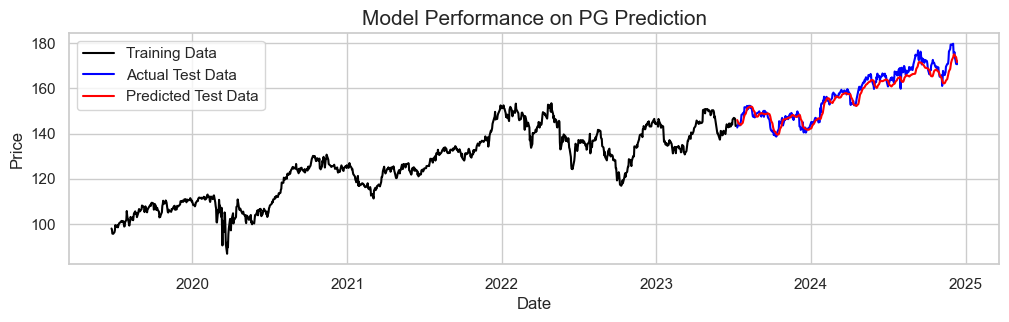

Starting tuning for TSLA...
Best Hyperparameters for TSLA:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_48 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 406ms/step - loss: 0.0946 - val_loss: 0.0139
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - loss: 0.0114 - val_loss: 0.0075
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - loss: 0.0076 - val_loss: 0.0191
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - loss: 0.0102 - val_loss: 0.0163
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - loss: 0.0108 - val_loss: 0.0090
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - loss: 0.0083 - val_loss: 0.0114
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - loss: 0.0073 - val_loss: 0.0040
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - loss: 0.0054 - val_loss: 0.0029
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - loss: 0.0051 - val_loss: 0.0069
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/ste

<Figure size 640x480 with 0 Axes>

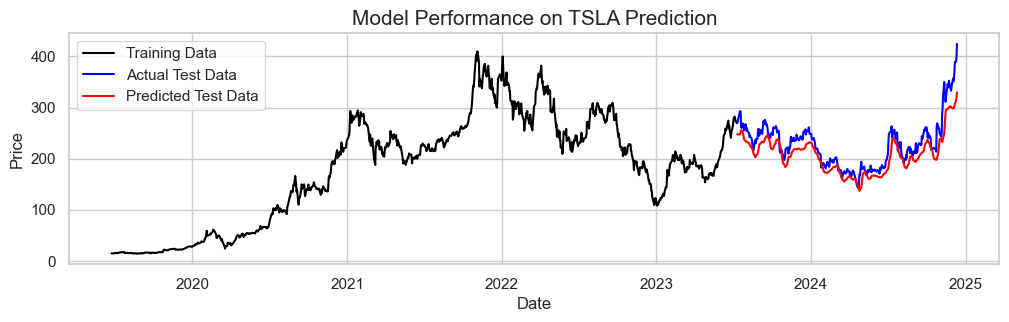

Starting tuning for UNH...
Best Hyperparameters for UNH:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_51 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_52 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - loss: 0.1183 - val_loss: 0.0294
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 292ms/step - loss: 0.0177 - val_loss: 0.0177
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - loss: 0.0132 - val_loss: 0.0286
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - loss: 0.0127 - val_loss: 0.0067
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/step - loss: 0.0101 - val_loss: 0.0348
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.0096 - val_loss: 0.0145
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.0075 - val_loss: 0.0169
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0064 - val_loss: 0.0134
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - loss: 0.0068 - val_loss: 0.0160
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 0.0074 - val_loss: 0.0047
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - loss: 0.0065 - val_loss: 0.0057
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step

<Figure size 640x480 with 0 Axes>

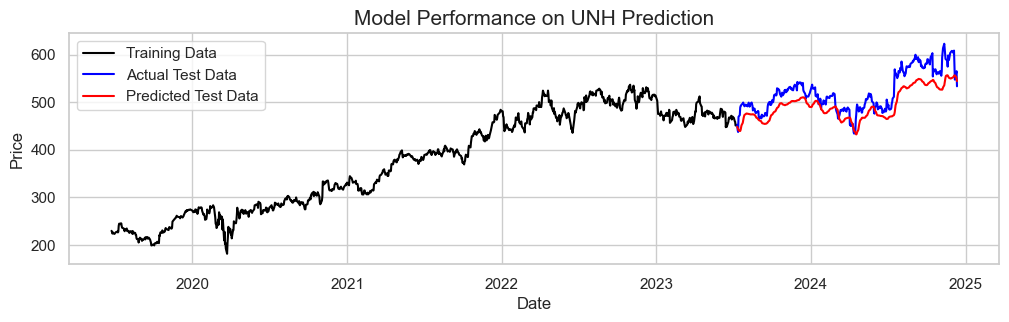

Starting tuning for V...
Best Hyperparameters for V:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_54 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_56 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - loss: 0.1683 - val_loss: 0.0078
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - loss: 0.0210 - val_loss: 0.0121
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - loss: 0.0217 - val_loss: 0.0046
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - loss: 0.0138 - val_loss: 0.0092
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - loss: 0.0176 - val_loss: 0.0082
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - loss: 0.0128 - val_loss: 0.0041
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0128 - val_loss: 0.0053
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 0.0113 - val_loss: 0.0313
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 0.0132 - val_loss: 0.0029
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 0.0092 - val_loss: 0.0044
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - loss: 0.0097 - val_loss: 0.0030
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step

<Figure size 640x480 with 0 Axes>

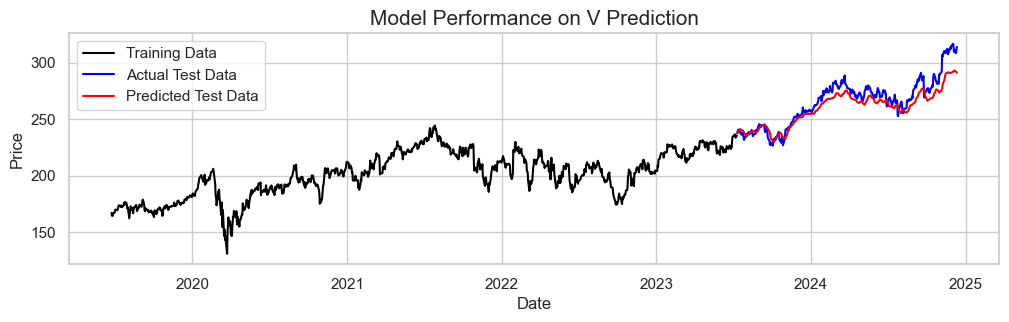

Starting tuning for WMT...
Best Hyperparameters for WMT:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_57 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_58 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_59 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - loss: 0.1301 - val_loss: 0.0187
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - loss: 0.0237 - val_loss: 0.0543
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - loss: 0.0229 - val_loss: 0.0057
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - loss: 0.0108 - val_loss: 0.0200
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0149 - val_loss: 0.0069
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 0.0085 - val_loss: 0.0072
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 0.0101 - val_loss: 0.0047
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 0.0093 - val_loss: 0.0045
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0086 - val_loss: 0.0049
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 0.0081 - val_loss: 0.0067
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - loss: 0.0078 - val_loss: 0.0046
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/ste

<Figure size 640x480 with 0 Axes>

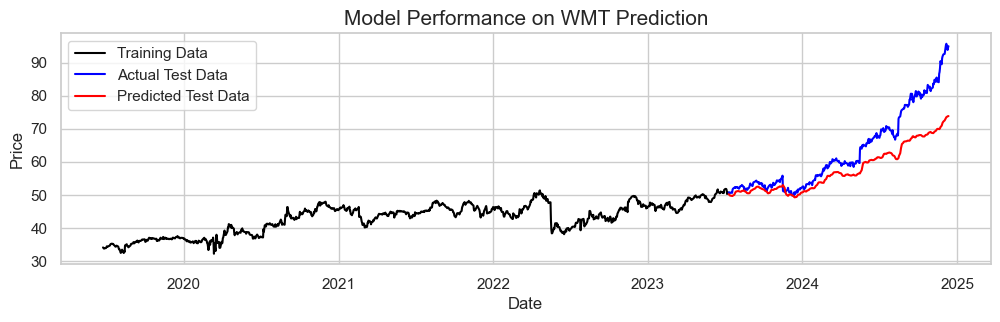

Starting tuning for XOM...
Best Hyperparameters for XOM:
 {'units_layer_1': 128, 'dropout_layer_1': 0.2, 'units_layer_2': 128, 'dropout_layer_2': 0.2, 'units_layer_3': 96, 'dropout_layer_3': 0.1, 'dense_units': 16, 'optimizer': 'rmsprop'}
                       0
units_layer_1        128
dropout_layer_1      0.2
units_layer_2        128
dropout_layer_2      0.2
units_layer_3         96
dropout_layer_3      0.1
dense_units           16
optimizer        rmsprop


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_60 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_62 (LSTM)                  │ (None, 96)             │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 286,113 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 270ms/step - loss: 0.0472 - val_loss: 0.0030
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - loss: 0.0052 - val_loss: 0.0092
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - loss: 0.0078 - val_loss: 0.0657
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - loss: 0.0093 - val_loss: 0.0168
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - loss: 0.0073 - val_loss: 0.0229
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - loss: 0.0069 - val_loss: 0.0143
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - loss: 0.0039 - val_loss: 0.0293
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - loss: 0.0050 - val_loss: 0.0035
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 297ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - loss: 0.0023 - val_loss: 0.0063
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step

<Figure size 640x480 with 0 Axes>

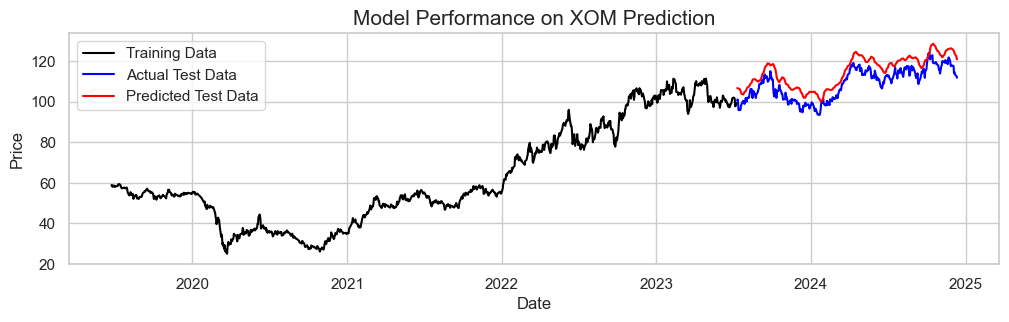

Total time taken for the entire process: 8718.822610855103 seconds


<Figure size 640x480 with 0 Axes>

In [27]:
sp500_results = find_fit_eva(df=sp500, test_size=test_size, results=results, tuner=tuner, define_model=define_model)

**Saving Model**

In [53]:
# sp500_results[0] into a single DataFrame
sp500_results_df = pd.concat(
    [df.assign(stock=stock) for stock, df in sp500_results[0].items()],
    ignore_index=True)

# Export
sp500_results_df.to_csv("../Data/sp500_hyper_df_5yrs.csv", index=False)

In [54]:
predictions = sp500_results[1]
predictions_df = pd.DataFrame({stock: pred.ravel() for stock, pred in predictions.items()})

# Export
predictions_df.to_csv("../Data/predictions_sp500_5yrs.csv", index=False)

In [55]:
import keras
import os
models_ = sp500_results[2]

# Loop through each stock model
for stock, model in models_.items():
    model_filename = f'models/{stock}_model_5yrs.keras' 
    model.save(model_filename)
    print(f"Model for {stock} saved to {model_filename}")

Model for AAPL saved to models/AAPL_model_5yrs.keras
Model for AMZN saved to models/AMZN_model_5yrs.keras
Model for AVGO saved to models/AVGO_model_5yrs.keras
Model for COST saved to models/COST_model_5yrs.keras
Model for GOOG saved to models/GOOG_model_5yrs.keras
Model for GOOGL saved to models/GOOGL_model_5yrs.keras
Model for HD saved to models/HD_model_5yrs.keras
Model for JPM saved to models/JPM_model_5yrs.keras
Model for LLY saved to models/LLY_model_5yrs.keras
Model for MA saved to models/MA_model_5yrs.keras
Model for META saved to models/META_model_5yrs.keras
Model for MSFT saved to models/MSFT_model_5yrs.keras
Model for NVDA saved to models/NVDA_model_5yrs.keras
Model for ORCL saved to models/ORCL_model_5yrs.keras
Model for PG saved to models/PG_model_5yrs.keras
Model for TSLA saved to models/TSLA_model_5yrs.keras
Model for UNH saved to models/UNH_model_5yrs.keras
Model for V saved to models/V_model_5yrs.keras
Model for WMT saved to models/WMT_model_5yrs.keras
Model for XOM sav

**Expected Return**

In [60]:
forecasted_returns_pct_list = []
for column in predictions_df.columns:
    # Correctly get the first and last value using .iloc
    forecasted_returns = (predictions_df[column].iloc[-1] - predictions_df[column].iloc[0]) / predictions_df[column].iloc[0]
    forecasted_returns_pct = forecasted_returns * 100
    forecasted_returns_pct_list.append(forecasted_returns_pct)

# Create a DataFrame from the list
forecasted_returns_df = pd.DataFrame(forecasted_returns_pct_list, index=predictions_df.columns, columns=["Expected Return (%)"])

# Find the top 10 highest returns
top_10_returns = forecasted_returns_df.sort_values(by="Expected Return (%)", ascending=False).head(10)
top_10_returns.to_csv("../Data/top_10_returns_sp500_5yrs.csv")

# All returns
sp500_returns = forecasted_returns_df.sort_values(by="Expected Return (%)", ascending=False)
sp500_returns.to_csv("../Data/sp500_returns_5yrs.csv")